# Chapter 12. Optimization Algorithms

* Almost all optimization problems arising in deep learning are nonconvex. 

* 在数学建模和工程设计中，了解和利用凸集和凸函数的性质，可以帮助我们更好地分析和解决问题。例如，在优化过程中，如果能够将问题转化为凸优化问题，那么就可以使用已知的数学工具和算法来找到最优解，这在计算机科学、经济学、金融学等领域都有应用。

* 非凸优化问题（Nonconvex Optimization Problem）：这类问题涉及到找到一个使得某个非凸函数最小的变量值。由于非凸函数可能没有全局最优解，解决这类问题通常更加复杂，可能需要特殊的算法和理论工具。

## Chatper 12.1 Optimization and Deep Learning

* For a deep learning problem, we will usually define a loss function first. Once we have the loss function, we can use an optimization algorithm in attempt to minimize the loss. 

* In optimization, a loss function is often referred to as the objective function of the optimization problem. 

* The goal of optimizatnion and deep learning are different. 

* ...training error and generalization error generally differ: since the objective function of the optimization algorithm is usually a loss function based on the training dataset, the goal of optimization is to reduce the training error. 

* However, the goal of deep learning (or more broadly, statistical inference) is to reduce the generalization error. To accomplish the latter we need to pay attention to overfitting in addition to using the optimization algorithm to reduce the training error.

In [4]:
%matplotlib inline
import numpy as np
import torch
from mpl_toolkits import mplot3d
from d2l import torch as d2l


In [5]:
def f(x):
    return x * torch.cos(np.pi * x)

def g(x):
    return f(x) + 0.2 * torch.cos(5 * np.pi * x)

In [6]:
def annotate(text, xy, xytext):
    d2l.plt.gca().annotate(text, xy=xy, xytext=xytext, arrowprops=dict(arrowstyle='->'))

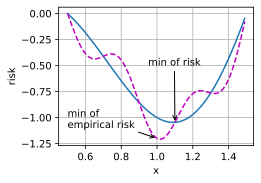

In [8]:
x = torch.arange(0.5, 1.5, 0.01)
d2l.set_figsize((4.5, 2.5))
d2l.plot(x, [f(x), g(x)], 'x', 'risk')
annotate('min of \nempirical risk', (1.0, -1.2), (0.5, -1.1))
annotate('min of risk', (1.1, -1.05), (0.95, -0.5))

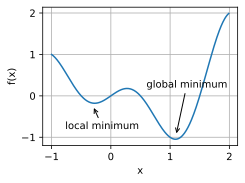

In [15]:
x = torch.arange(-1.0, 2.0, 0.01)
d2l.plot(x, [f(x),], 'x', 'f(x)')
annotate('local minimum', (-0.3, -0.25), (-0.77, -0.8))
annotate('global minimum', (1.1, -0.95), (0.6, 0.2))

* A saddle point is any location where all gradients of a function vanish but which is neither a global nor a local minimum. 

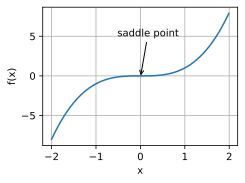

In [17]:
x = torch.arange(-2.0, 2.0, 0.01)
d2l.plot(x, [x**3], 'x', 'f(x)')
annotate('saddle point', (0, -0.2), (-0.52, 5.0))

/Users/yfzhu/opt/anaconda3/envs/d2l/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Text(0.5, 0.5, 'y')

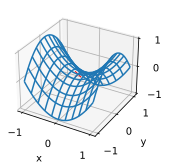

In [18]:
x, y = torch.meshgrid(
    torch.linspace(-1.0, 1.0, 101), torch.linspace(-1.0, 1.0, 101)
)
z = x**2 - y**2

ax = d2l.plt.figure().add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, **{'rstride': 10, 'cstride': 10})
ax.plot([0], [0], [0], 'rx')

ticks = [-1, 0, 1]

d2l.plt.xticks(ticks)
d2l.plt.yticks(ticks)

ax.set_zticks(ticks)

d2l.plt.xlabel('x')
d2l.plt.ylabel('y')


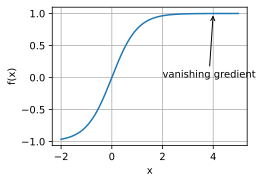

In [19]:
x = torch.arange(-2.0, 5.0, 0.01)
d2l.plot(x, [torch.tanh(x)], 'x', 'f(x)')
annotate('vanishing gredient', (4, 1), (2, 0.0))

## Chapter 12.2 Convexity

In [20]:
%matplotlib inline
import numpy as np
import torch
from mpl_toolkits import mplot3d
from d2l import torch as d2l

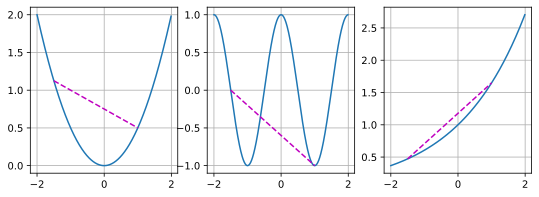

In [21]:
f = lambda x: 0.5 * x**2
g = lambda x: torch.cos(np.pi * x)
h = lambda x: torch.exp(0.5 * x)

x, segment = torch.arange(-2, 2, 0.01), torch.tensor([-1.5, 1])
d2l.use_svg_display()
_, axes = d2l.plt.subplots(1, 3, figsize=(9, 3))

for ax, func in zip(axes, [f, g, h]):
    d2l.plot([x, segment], [func(x), func(segment)], axes=ax)


- First and foremost, the local minima of convex functions are also the global minima. 


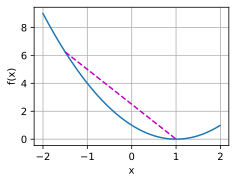

In [22]:
f = lambda x: (x - 1) ** 2
d2l.set_figsize()
d2l.plot([x, segment], [f(x), f(segment)], 'x', 'f(x)')


## Chapter 12.3 

In [24]:
%matplotlib inline
import numpy as np
import torch
from d2l import torch as d2l


In [23]:
def f(x):
    return x ** 2

def f_grad(x):
    return 2 * x

def gd(eta, f_grad):
    x = 10.0
    results = [x]
    
    for i in range(10):
        x -= eta * f_grad(x)
        results.append(float(x))
    
    print(f'epoch 10, x:{x:f}')
    
    return results



In [25]:
results = gd(0.2, f_grad)

epoch 10, x:0.060466


In [26]:
def show_trace(results, f):
    n = max(abs(min(results)), abs(max(results)))
    f_line = torch.arange(-n, n, 0.01)
    
    d2l.set_figsize()
    d2l.plot([f_line, results], 
             [[f(x) for x in f_line], [f(x) for x in results]], 
             'x', 'f(x)', fmts=['-', '-o'])
    

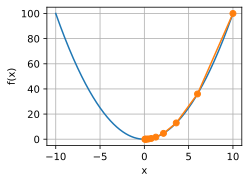

In [27]:
show_trace(results, f)

epoch 10, x:1.073742


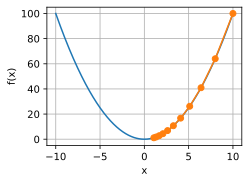

In [32]:
show_trace(gd(0.1, f_grad), f)

epoch 10, x:61.917364


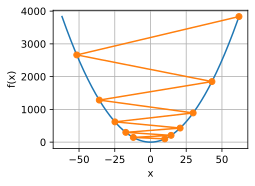

In [33]:
show_trace(gd(1.1, f_grad), f)

epoch 10, x:-1.742722


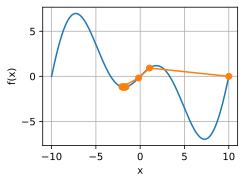

In [38]:
c = torch.tensor(0.15 * np.pi)

def g(x):
    return x * torch.cos(c * x)

def g_grad(x):
    return torch.cos(c * x) - c * x * torch.sin(c * x)

show_trace(gd(1.9, g_grad), g)

In [39]:
def train_2d(trainer, steps=20, f_grad=None):
    """Optimize a 2D objective function with a customized trainer."""
    
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1, x2)]
    
    for i in range(steps):
        if f_grad:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2, f_grad)
        else:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
            
        results.append((x1, x2))
    
    print(f'epoch {i + 1}, x1: {float(x1):f}, x2: {float(x2):f}')
    return results



In [40]:
def show_trace_2d(f, results):
    """Show the trace of 2D variables during optimization"""
    
    d2l.set_figsize()
    d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = torch.meshgrid(torch.arange(-5.5, 1.0, 0.1), 
                           torch.arange(-3.0, 1.0, 0.1), indexing='ij')
    d2l.plt.contour(x1, x2, f(x1, x2), color='#1f77b4')
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')
    

In [43]:
def f_2d(x1, x2):
    return x1 ** 2 + 2 * x2 ** 2

def f_2d_grad(x1, x2):
    return (2 * x1, 4 * x2)

def gd_2d(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    return (x1 - eta * g1, x2 - eta * g2, 0, 0)


epoch 20, x1: -0.057646, x2: -0.000073


/var/folders/ts/7d32g6251pb40yxfn11kd6z00000gr/T/ipykernel_14682/3062657184.py:8: UserWarning: The following kwargs were not used by contour: 'color'
  d2l.plt.contour(x1, x2, f(x1, x2), color='#1f77b4')


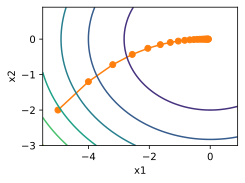

In [44]:
eta = 0.1
show_trace_2d(f_2d, train_2d(gd_2d, f_grad=f_2d_grad))

epoch 10, x: tensor(9.6636)


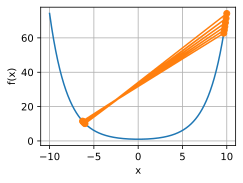

In [49]:
c = torch.tensor(0.5)

def f(x):
    return torch.cosh(c * x)

def f_grad(x):
    return c * torch.sinh(c * x)

def f_hess(x):
    return c**2 * torch.cosh(c * x)

def newton(eta=1):
    x = 10.0
    results = [x]
    
    for i in range(10):
        x -= eta * f_grad(x) / f_hess(x)
        results.append(float(x))
        
    print('epoch 10, x:', x)
    return results

show_trace(newton(eta=8), f)

epoch 10, x: tensor(26.8341)


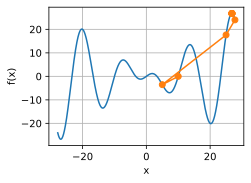

In [55]:
c = torch.tensor(0.15 * np.pi)

def f(x):
    return x * torch.cos(c * x)

def f_grad(x):
    return torch.cos(c * x) - c * x * torch.sin(c * x)

def f_hess(x):
    return - 2 * c * torch.sin(c * x) - x * c**2 * torch.cos(c * x)

show_trace(newton(eta=1), f)

## Chapter 12.4 Stochastic Gradient Descent

In [56]:
%matplotlib inline
import math
import torch
from d2l import torch as d2l

epoch 50, x1: -0.123703, x2: 0.072259


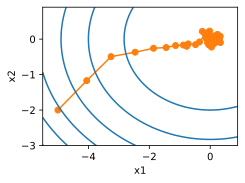

In [57]:
def f(x1, x2):
    return x1 ** 2 + 2 * x2 ** 2

def f_grad(x1, x2):
    return 2 * x1, 4 * x2

def sgd(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    
    g1 += torch.normal(0.0, 1, (1, )).item()
    g2 += torch.normal(0.0, 1, (1, )).item()
    eta_t = eta * lr()
    
    return (x1 - eta_t * g1, x2 - eta_t * g2, 0, 0)

def constant_lr():
    return 1

eta = 0.1
lr = constant_lr

d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))

epoch 1000, x1: -0.958474, x2: -0.094311


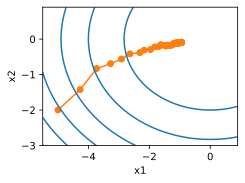

In [58]:
def exponential_lr():
    
    global t
    t += 1
    return math.exp(-0.1 * t)

t = 1
lr = exponential_lr

d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=1000, f_grad=f_grad))

epoch 1000, x1: 0.072654, x2: 0.008899


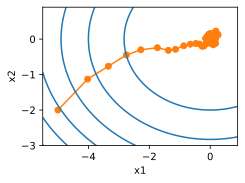

In [60]:
def polynomial_lr():
    global t
    t += 1
    return (1 + 0.1 * t) ** (-0.5)

t = 1
lr = polynomial_lr

d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=1000, f_grad=f_grad))

## Chapter 12.5 Minibatch Stochastic Gradient Descent

In [61]:
%matplotlib inline
import time
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l


In [62]:
A = torch.zeros(256, 256)
B = torch.randn(256, 256)
C = torch.randn(256, 256)

In [72]:
class Timer:
    """Record multiple running times."""
    
    def __init__(self):
        self.times = []
        self.start()
        
    def start(self):
        self.tlk = time.time()
        
    def stop(self):
        self.times.append(time.time() - self.tlk)
        return self.times[-1]
    
    def avg(self):
        return sum(self.times) / len(self.times)
    
    def sum(self):
        return sum(self.times)
    
    def cumsum(self):
        return np.array(self.times).cumsum.tolist()
    

In [73]:
timer = Timer()

In [74]:
timer.start()
for i in range(256):
    for j in range(256):
        A[i, j] = torch.dot(B[i, :], C[:, j])

timer.stop()

1.071063756942749

In [75]:
timer.start()
for j in range(256):
    A[:, j] = torch.mv(B, C[:, j])
timer.stop()

0.0262300968170166

In [77]:
timer.start()
A = torch.mm(B, C)
timer.stop()

gigaflops = [0.03 / i for i in timer.times]

print(f'performance in Gigaflops: element {gigaflops[0]:.3f}, '
     f'column {gigaflops[1]:.3f}, full {gigaflops[2]:.3f}')


performance in Gigaflops: element 0.028, column 1.144, full 2.995


In [79]:
timer.start()
for j in range(0, 256, 64):
    A[:, j:j+64] = torch.mm(B, C[:, j:j+64])
timer.stop()

print(f'performance in Gigaflops: block {0.03 / timer.times[3]:.3f}')

performance in Gigaflops: block 5.063


In [80]:
d2l.DATA_HUB['airfoil'] = (d2l.DATA_URL + 'airfoil_self_noise.dat',
                          '76e5be1548fd8222e5074cf0faae75edff8cf93f')

def get_data_ch11(batch_size=10, n=1500):
    data = np.genfromtxt(d2l.download('airfoil'), 
                        dtype=np.float32, delimiter='\t')
    data = torch.from_numpy((data - data.mean(axis=0)) / data.std(axis=0))
    data_iter = d2l.load_array((data[:n, :-1], data[:n, -1]), 
                              batch_size, is_train=True)
    
    return data_iter, data.shape[1]-1

In [81]:
def sgd(params, states, hyperparams):
    for p in params:
        p.data.sub_(hyperparams['lr'] * p.grad)
        p.grad.data.zero_()

In [86]:
def train_ch11(trainer_fn, states, hyperparams, data_iter, feature_dim, num_epochs=2):
    
    w = torch.normal(mean=0.0, std=0.01, size=(feature_dim, 1), requires_grad=True)
    b = torch.zeros((1), requires_grad=True)
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', 
                           xlim=[0, num_epochs], ylim=[0.22, 0.35])
    
    n, timer = 0, d2l.Timer()
    
    for _ in range(num_epochs):
        for X, y in data_iter:
            l = loss(net(X), y).mean()
            l.backward()
            trainer_fn([w, b], states, hyperparams)
            n += X.shape[0]
            
            if n % 200 == 0:
                timer.stop()
                animator.add(n/X.shape[0]/len(data_iter), 
                            (d2l.evaluate_loss(net, data_iter, loss), ))
                timer.start()
                
    print(f'loss: {animator.Y[0][-1]:.3f}, {timer.sum()/num_epochs:.3f} sec/epoch')
    return timer.cumsum(), animator.Y[0]


loss: 0.246, 0.012 sec/epoch


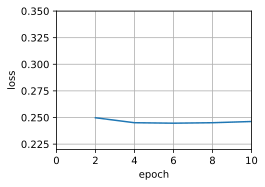

In [87]:
def train_sgd(lr, batch_size, num_epochs=2):
    data_iter, feature_dim = get_data_ch11(batch_size)
    return train_ch11( 
        sgd, None, {'lr': lr}, data_iter, feature_dim, num_epochs)

gd_res = train_sgd(1, 1500, 10)

loss: 0.244, 0.339 sec/epoch


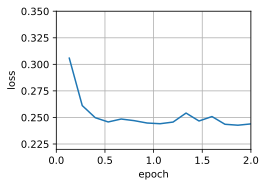

In [88]:
sgd_res = train_sgd(0.005, 1)

loss: 0.242, 0.020 sec/epoch


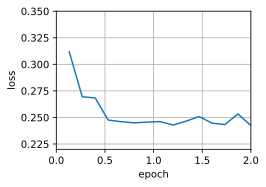

In [89]:
mini1_res = train_sgd(.4, 100)

loss: 0.242, 0.047 sec/epoch


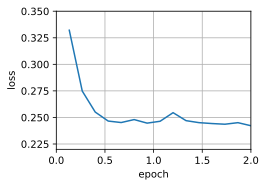

In [90]:
mini2_res = train_sgd(.05, 10)

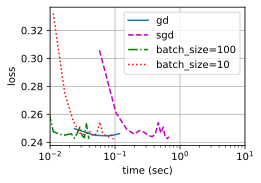

In [91]:
d2l.set_figsize([6, 3])

d2l.plot(*list(map(list, zip(gd_res, sgd_res, mini1_res, mini2_res))), 
        'time (sec)', 'loss', xlim=[1e-2, 10], 
        legend=['gd', 'sgd', 'batch_size=100', 'batch_size=10'])

d2l.plt.gca().set_xscale('log')

In [96]:
#@save
def train_concise_ch11(trainer_fn, hyperparams, data_iter, num_epochs=4):
    # Initialization
    net = nn.Sequential(nn.Linear(5, 1))
    def init_weights(module):
        if type(module) == nn.Linear:
            torch.nn.init.normal_(module.weight, std=0.01)
    net.apply(init_weights)

    optimizer = trainer_fn(net.parameters(), **hyperparams)
    loss = nn.MSELoss(reduction='none')
    animator = d2l.Animator(xlabel='epoch', ylabel='loss',
                            xlim=[0, num_epochs], ylim=[0.22, 0.35])
    n, timer = 0, d2l.Timer()
    for _ in range(num_epochs):
        for X, y in data_iter:
            optimizer.zero_grad()
            out = net(X)
            y = y.reshape(out.shape)
            l = loss(out, y)
            l.mean().backward()
            optimizer.step()
            n += X.shape[0]
            if n % 200 == 0:
                timer.stop()
                # `MSELoss` computes squared error without the 1/2 factor
                animator.add(n/X.shape[0]/len(data_iter),
                             (d2l.evaluate_loss(net, data_iter, loss) / 2,))
                timer.start()
    print(f'loss: {animator.Y[0][-1]:.3f}, {timer.sum()/num_epochs:.3f} sec/epoch')


loss: 0.245, 0.048 sec/epoch


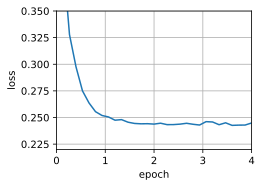

In [97]:
data_iter, _ = get_data_ch11(10)
trainer = torch.optim.SGD
train_concise_ch11(trainer, {'lr': 0.01}, data_iter)

## Chapter 12.6 Momentum

In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

epoch 20, x1: -0.943467, x2: -0.000073


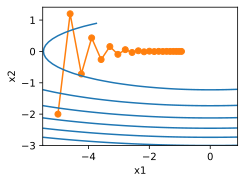

In [4]:
eta = 0.4

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 0.2 * x1, x2 - eta * 4 * x2, 0, 0)

d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

epoch 20, x1: -0.387814, x2: -1673.365109


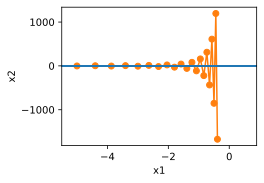

In [9]:
eta = 0.6
d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

epoch 20, x1: -0.126340, x2: -0.186632


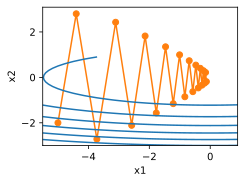

In [17]:
def momentum_2d(x1, x2, v1, v2):
    v1 = beta * v1 + 0.2 * x1
    v2 = beta * v2 + 4 * x2
    return x1 -eta * v1, x2 - eta * v2, v1, v2

eta, beta = 0.6, 0.25
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))

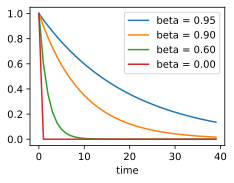

In [19]:
d2l.set_figsize()

betas = [0.95, 0.9, 0.6, 0]

for beta in betas:
    x = torch.arange(40).detach().numpy()
    d2l.plt.plot(x, beta ** x, label=f'beta = {beta:.2f}')
    
d2l.plt.xlabel('time')
d2l.plt.legend();


In [20]:
def init_momentum_states(feature_dim):
    v_w = torch.zeros((feature_dim, 1))
    v_b = torch.zeros(1)
    return (v_w, v_b)

def sgd_momentum(params, states, hyperparams):
    for p, v in zip(params, states):
        with torch.no_grad():
            v[:] = hyperparams['momentum'] * v + p.grad
            p[:] -= hyperparams['lr'] * v
            
        p.grad.data.zero_()
        

loss: 0.244, 0.082 sec/epoch


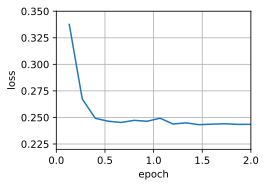

In [21]:
def train_momentum(lr, momentum, num_epochs=2):
    
    d2l.train_ch11(sgd_momentum, init_momentum_states(feature_dim), 
                  {'lr': lr, 'momentum': momentum}, data_iter, 
                  feature_dim, num_epochs)
    
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)

train_momentum(0.02, 0.5)

loss: 0.257, 0.055 sec/epoch


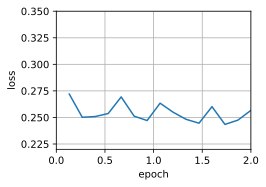

In [22]:
train_momentum(0.01, 0.9)

loss: 0.244, 0.056 sec/epoch


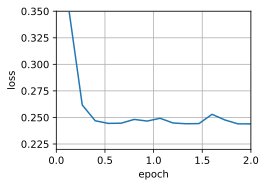

In [23]:
train_momentum(0.005, 0.9)

loss: 0.248, 0.050 sec/epoch


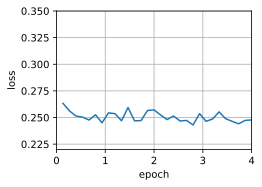

In [24]:
# Concise implementation

trainer = torch.optim.SGD
d2l.train_concise_ch11(trainer, {'lr': 0.005, 'momentum': 0.9}, data_iter)

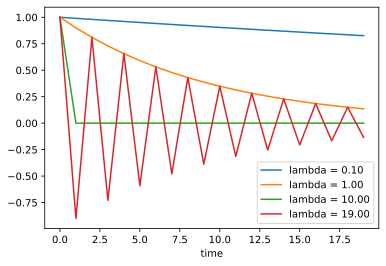

In [26]:
# scaler functions

lambdas = [0.1, 1, 10, 19]
eta = 0.1
d2l.set_figsize((6, 4))

for lam in lambdas:
    t = torch.arange(20).detach().numpy()
    d2l.plt.plot(t, (1 - eta * lam) ** t, label=f'lambda = {lam:.2f}')

d2l.plt.xlabel('time')
d2l.plt.legend();


## Chapter 12.7 Adagrad

epoch 20, x1: -2.382563, x2: -0.158591


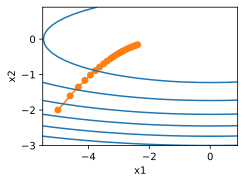

In [27]:
%matplotlib inline

import math
import torch
from d2l import torch as d2l

def adagrad_2d(x1, x2, s1, s2):
    eps = 1e-6
    g1, g2 = 0.2 * x1, 4 * x2
    s1 += g1 ** 2
    s2 += g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

eta = 0.4
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))


epoch 20, x1: -0.002295, x2: -0.000000


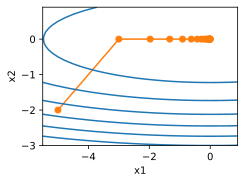

In [28]:
eta = 2
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

In [35]:
# Scratch implementation

def init_adagrad_states(feature_dim):
    s_w = torch.zeros((feature_dim, 1))
    s_b = torch.zeros(1)
    
    return (s_w, s_b)

def adagrad(params, states, hyperparams):
    eps = 1e-6
    
    for p, s in zip(params, states):
        with torch.no_grad():
            s[:] += torch.square(p.grad)
            p[:] -= hyperparams['lr'] * p.grad / torch.sqrt(s + eps)
        p.grad.data.zero_()
        

loss: 0.242, 0.058 sec/epoch


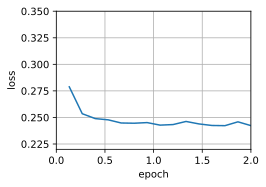

In [36]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(adagrad, init_adagrad_states(feature_dim), 
              {'lr': 0.1}, data_iter, feature_dim);


loss: 0.242, 0.055 sec/epoch


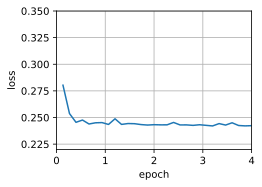

In [37]:
# Concise implementation

trainer = torch.optim.Adagrad
d2l.train_concise_ch11(trainer, {'lr': 0.1}, data_iter)

## Chapter 12.8 RMSProp

In [38]:
import math
import torch
from d2l import torch as d2l


Text(0.5, 0, 'time')

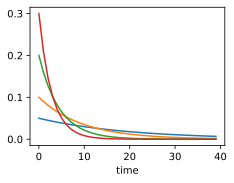

In [39]:
d2l.set_figsize()
gammas = [0.95, 0.9, 0.8, 0.7]

for gamma in gammas:
    x = torch.arange(40).detach().numpy()
    d2l.plt.plot(x, (1-gamma) * gamma ** x, label=f'gamma = {gamma:.2f}')
    
d2l.plt.xlabel('time')


epoch 20, x1: -0.010599, x2: 0.000000


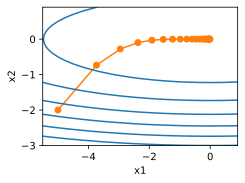

In [40]:
# Scratch implementation

def rmsprop_2d(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6
    s1 = gamma * s1 + (1 - gamma) * g1 ** 2
    s2 = gamma * s2 + (1 - gamma) * g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

eta, gamma = 0.4, 0.9
d2l.show_trace_2d(f_2d, d2l.train_2d(rmsprop_2d))


In [41]:
def init_rmsprop_states(feature_dim):
    s_w = torch.zeros((feature_dim, 1))
    s_b = torch.zeros(1)
    
    return (s_w, s_b)

def rmsprop(params, states, hyperparams):
    gamma, eps = hyperparams['gamma'], 1e-6
    
    for p, s in zip(params, states):
        with torch.no_grad():
            s[:] = gamma * s + (1 - gamma) * torch.square(p.grad)
            p[:] -= hyperparams['lr'] * p.grad / torch.sqrt(s + eps)
        p.grad.data.zero_()
        

loss: 0.245, 0.061 sec/epoch


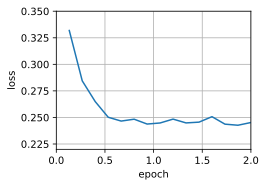

In [42]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(rmsprop, init_rmsprop_states(feature_dim), 
              {'lr': 0.01, 'gamma': 0.9}, data_iter, feature_dim);


loss: 0.242, 0.053 sec/epoch


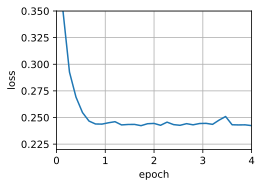

In [43]:
trainer = torch.optim.RMSprop
d2l.train_concise_ch11(trainer, {'lr': 0.01, 'alpha': 0.9}, data_iter)

## Chapter 12.9 Adadelta

In [44]:
%matplotlib inline
import torch
from d2l import torch as d2l


In [49]:
def init_adadelta_states(feature_dim):
    s_w, s_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    delta_w, delta_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    return ((s_w, delta_w), (s_b, delta_b))

def adadelta(params, states, hyperparams):
    rho, eps = hyperparams['rho'], 1e-5
    
    for p, (s, delta) in zip(params, states):
        with torch.no_grad():
            # In-place updates via [:]
            s[:] = rho * s + (1 - rho) * torch.square(p.grad)
            g = (torch.sqrt(delta + eps) / torch.sqrt(s + eps)) * p.grad
            p[:] -= g
            delta[:] = rho * delta + (1 - rho) * g * g
        p.grad.data.zero_()
        
        

loss: 0.246, 0.071 sec/epoch


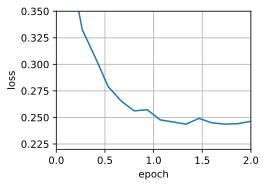

In [50]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(adadelta, init_adadelta_states(feature_dim), 
              {'rho': 0.9}, data_iter, feature_dim);

loss: 0.243, 0.058 sec/epoch


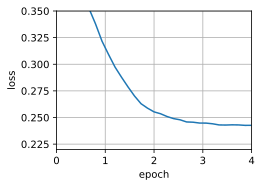

In [51]:
trainer = torch.optim.Adadelta
d2l.train_concise_ch11(trainer, {'rho': 0.9}, data_iter)

## Chapter 12.10 Adam

In [52]:
%matplotlib inline
import torch
from d2l import torch as d2l

In [55]:
def init_adam_states(feature_dim):
    v_w, v_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    s_w, s_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    return ((v_w, s_w), (v_b, s_b))

def adam(params, states, hyperparams):
    beta1, beta2, eps = 0.9, 0.999, 1e-6
    for p, (v, s) in zip(params, states):
        with torch.no_grad():
            v[:] = beta1 * v + (1 - beta1) * p.grad
            s[:] = beta2 * v + (1 - beta2) * torch.square(p.grad)
            v_bias_corr = v / (1 - beta1 ** hyperparams['t'])
            s_bias_corr = s / (1 - beta2 ** hyperparams['t'])
            p[:] -= hyperparams['lr'] * v_bias_corr / (torch.sqrt(s_bias_corr) + eps)
            
        p.grad.data.zero_()
    hyperparams['t'] += 1
    

loss: nan, 0.070 sec/epoch


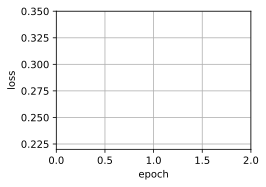

In [56]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(adam, init_adam_states(feature_dim), 
              {'lr': 0.01, 't': 1}, data_iter, feature_dim);

loss: 0.243, 0.061 sec/epoch


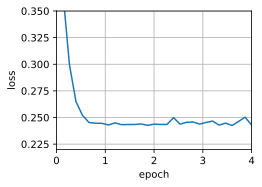

In [57]:
trainer = torch.optim.Adam
d2l.train_concise_ch11(trainer, {'lr': 0.01}, data_iter)

In [60]:
def yogi(params, states, hyperparams):
    beta1, beta2, eps = 0.9, 0.999, 1e-3
    for p, (v, s) in zip(params, states):
        with torch.no_grad():
            v[:] = beta1 * v + (1 - beta1) * p.grad
            s[:] = s + (1 - beta2) * torch.sign(
                torch.square(p.grad) - s) * torch.square(p.grad)
            v_bias_corr = v / (1 - beta1 ** hyperparams['t'])
            s_bias_corr = s / (1 - beta2 ** hyperparams['t'])
            p[:] -= hyperparams['lr'] * v_bias_corr / (torch.sqrt(s_bias_corr) + eps)
            
        p.grad.data.zero_()
    hyperparams['t'] += 1

loss: 0.244, 0.072 sec/epoch


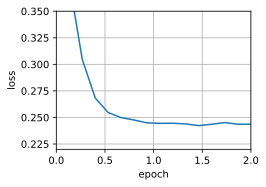

In [61]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(yogi, init_adam_states(feature_dim), 
              {'lr': 0.01, 't': 1}, data_iter, feature_dim);

## Chapter 12.11 Learning Rate Scheduling